* Done By: Yasmeen Toukhy
* Batch : SEPT BATCH A3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import r2_score, accuracy_score, f1_score, mean_squared_error,  mean_absolute_error
from sklearn import neighbors

import warnings
import os

In [ ]:
dataSet = pd.read_csv('advertising.csv')

In [ ]:
dataSet.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
dataSet.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
print(dataSet.isna().sum())
print("%%%%%%%%%%%%%%%")
print("The Data size is ",dataSet.shape)

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
%%%%%%%%%%%%%%%
The Data size is  (200, 4)


# **DATA VISUALIZATION**

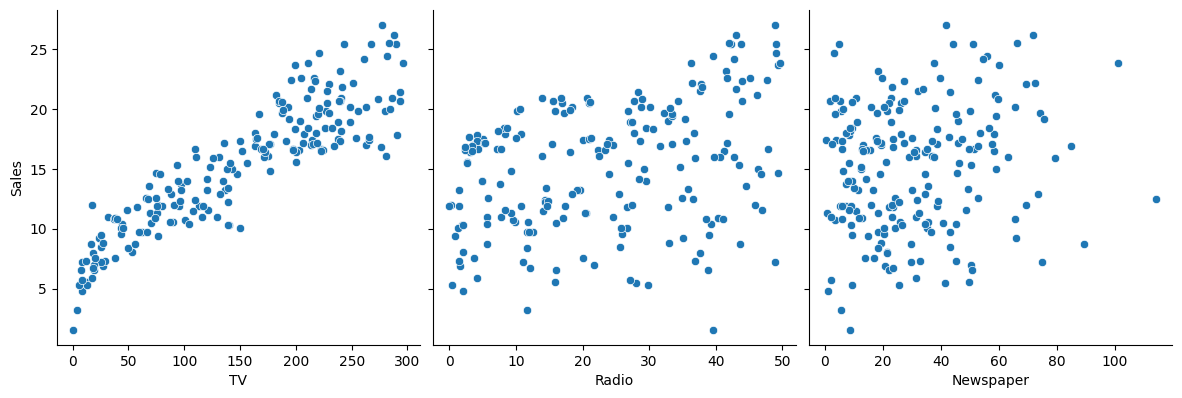

In [ ]:
sns.pairplot(data=dataSet, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4)

<Axes: >

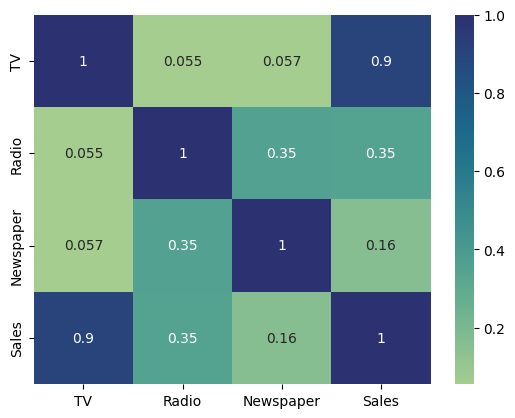

In [ ]:
sns.heatmap(dataSet.corr(), cmap = 'crest', annot = True)

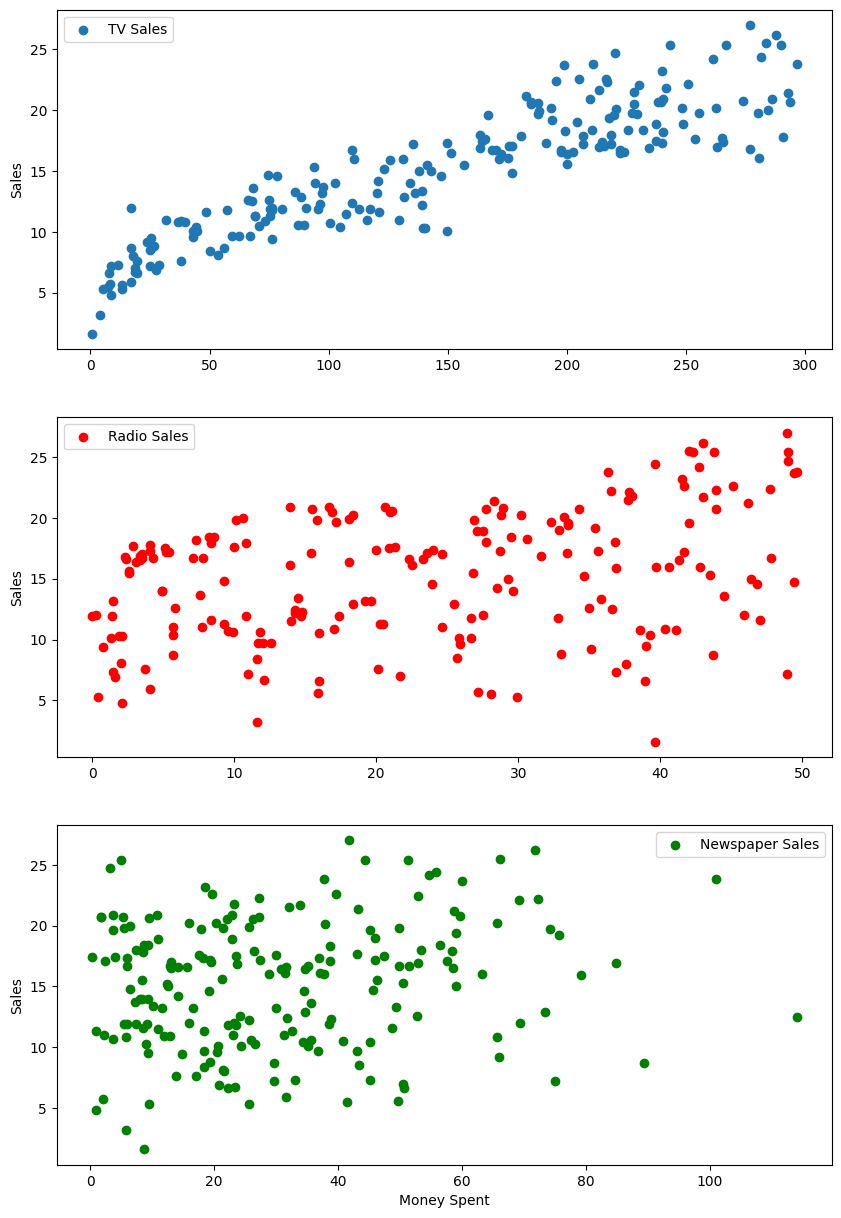

In [ ]:
fig, ax=plt.subplots(3,1,figsize=(10, 15))

ax[0].scatter(dataSet['TV'],dataSet['Sales'],label='TV Sales')
ax[0].set_ylabel('Sales')
ax[0].legend()

ax[1].scatter(dataSet['Radio'],dataSet['Sales'],c='red',label='Radio Sales')
ax[1].set_ylabel('Sales')
ax[1].legend()

ax[2].scatter(dataSet['Newspaper'],dataSet['Sales'],c='green',label='Newspaper Sales')
ax[2].set_ylabel('Sales')
ax[2].set_xlabel('Money Spent')
ax[2].legend()


plt.show()

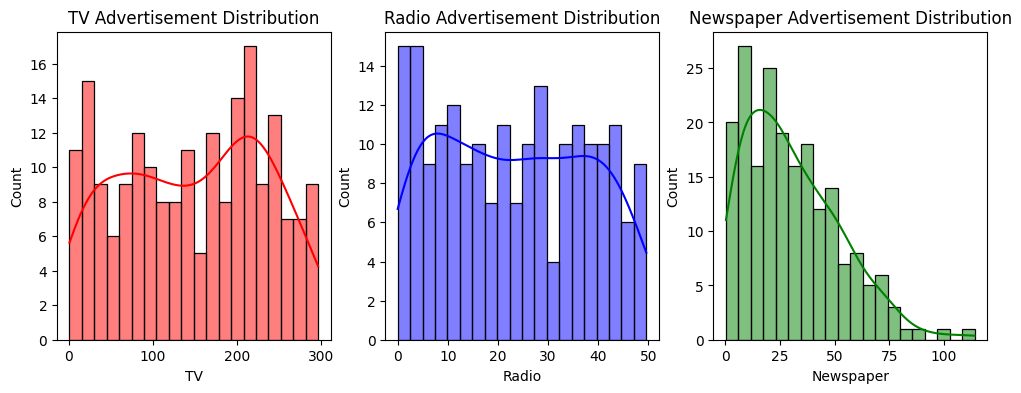

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.histplot(dataSet['TV'], bins=20, kde=True, color='r')
plt.title('TV Advertisement Distribution')

plt.subplot(132)
sns.histplot(dataSet['Radio'], bins=20, kde=True, color='b')
plt.title('Radio Advertisement Distribution')

plt.subplot(133)
sns.histplot(dataSet['Newspaper'], bins=20, kde=True, color='green')
plt.title('Newspaper Advertisement Distribution')

plt.show()

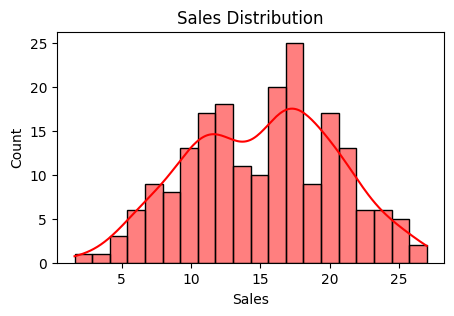

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(dataSet['Sales'], bins=20, kde=True, color='r')
plt.title('Sales Distribution')
plt.show()

# **MODEL BUILDING**

In [ ]:
X = dataSet[['TV', 'Radio', 'Newspaper']]
y = dataSet['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# *Linear Regression*

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 2.91
R-squared (R2): 0.91


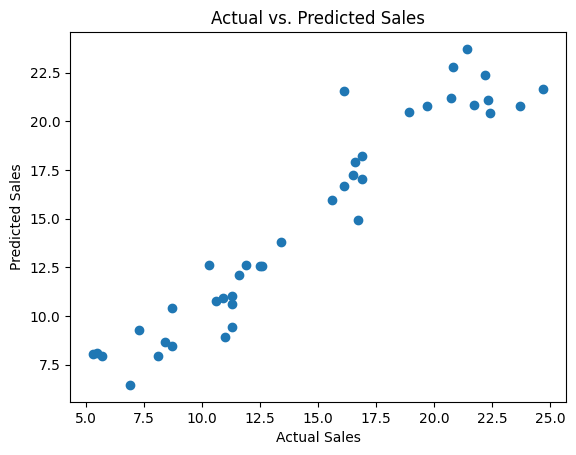

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()

# *Decision Tree*

In [ ]:
model=DecisionTreeRegressor(random_state=22)
model.fit(X_train,y_train)
y_predi=model.predict(X_test)
r2_score(y_test,y_predi)


0.9114513722812456

In [ ]:
mean_absolute_error(y_test,y_predi)

1.1825000000000003

# *Random Forest Regression*

In [ ]:
model=RandomForestRegressor(n_estimators=100,random_state=22)
model.fit(X_train,y_train)
y_predi=model.predict(X_test)
r2_score(y_test,y_predi)

0.954763944487413

In [ ]:
mean_absolute_error(y_test,y_predi)

0.9054250000000004

# *KNN Regression*

In [ ]:
model=neighbors.KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train,y_train)
y_pre=model.predict(X_test)
r2_score(y_test,y_predi)

0.954763944487413

In [ ]:
mean_absolute_error(y_test,y_predi)

0.9054250000000004